In [1]:
library(tidyverse) 

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#Open area and population data
state_area = read_csv("data/state_area.csv")

head(state_area)

state_pop = read_csv("data/dat_population.csv")
colnames(state_pop) = c("state_name", "year", "population")

head(state_pop)

#Open a past file for list of 50 states

oilgas = read_csv("https://raw.githubusercontent.com/paulh777/COMM295_data/main/output_files/percentage_oilgas_wide.csv") 

state_list = oilgas$state_name

state_list

Rows: 59 Columns: 17

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): state_name, coastal_water_area_sqmi, coastal_water_area_sqkm, grea...
dbl (10): total_area_sqmi, total_area_sqkm, land_area_sqmi, land_area_sqkm, ...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



state_name,total_area_sqmi,total_area_sqkm,land_area_sqmi,land_area_sqkm,total_water_area_sqmi,total_water_area_sqkm,inland_water_area_sqmi,inland_water_area_sqkm,coastal_water_area_sqmi,coastal_water_area_sqkm,great_lakes_water_area_sqmi,great_lakes_water_area_sqkm,territorial_water_area_sqmi,territorial_water_area_sqkm,internal_point_lattitude,internal_point_longitude
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Total3,3805927,9857306,3535932,9158022,269995,699284,85763,222125,42371,109742,60094,155643,81767,211774,NA,NA
United States4,3796742,9833517,3531905,9147593,264837,685924,85647,221824,42337,109652,60094,155643,76759,198806,NA,NA
Alabama,52420,135767,50645,131171,1775,4597,1058,2740,517,1340,—,—,199,516,32.73963,-86.84346
Alaska,665384,1723337,570641,1477953,94743,245383,19304,49997,26119,67647,—,—,49320,127739,63.34619,-152.83707
Arizona,113990,295234,113594,294207,396,1026,396,1026,—,—,—,—,—,—,34.20996,-111.60240
Arkansas,53179,137732,52035,134771,1143,2961,1143,2961,—,—,—,—,—,—,34.89553,-92.44463


Rows: 1150 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): State
dbl (2): Year, Population


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



state_name,year,population
<chr>,<dbl>,<dbl>
Alabama,1997,4.368078
Alabama,1998,4.405941
Alabama,1999,4.429410
Alabama,2000,4.452441
Alabama,2001,4.467493
Alabama,2002,4.475728


Rows: 50 Columns: 24

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): state_name
dbl (23): 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, ...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

In [3]:
#Filter out all non_states and miles

state_area = state_area %>%
    filter(state_name %in% state_list) %>%
    select(state_name, land_area_sqkm)

head(state_area)

nrow(state_area) #check how many rows

state_name,land_area_sqkm
<chr>,<dbl>
Alabama,131171
Alaska,1477953
Arizona,294207
Arkansas,134771
California,403466
Colorado,268431


[1] 50

In [4]:
#Joining population and area
pop_density = left_join(state_pop, state_area, by = "state_name")

head(pop_density, 10)

state_name,year,population,land_area_sqkm
<chr>,<dbl>,<dbl>,<dbl>
Alabama,1997,4.368078,131171
Alabama,1998,4.405941,131171
Alabama,1999,4.429410,131171
Alabama,2000,4.452441,131171
Alabama,2001,4.467493,131171
Alabama,2002,4.475728,131171
Alabama,2003,4.509677,131171
Alabama,2004,4.536741,131171
Alabama,2005,4.570064,131171


In [5]:
pop_density = pop_density %>%
    mutate(population = population *10^6,          #multiplying by 1 million
           pop_density = population/land_area_sqkm)

In [6]:
head(pop_density)

pop_density_wide = pop_density %>%
    select(-population, -land_area_sqkm) %>%
    pivot_wider(names_from = year,
                values_from = pop_density)

head(pop_density_wide)

state_name,year,population,land_area_sqkm,pop_density
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,1997,4368078,131171,33.30064
Alabama,1998,4405941,131171,33.58929
Alabama,1999,4429410,131171,33.76821
Alabama,2000,4452441,131171,33.94379
Alabama,2001,4467493,131171,34.05854
Alabama,2002,4475728,131171,34.12132


state_name,1997,1998,1999,2000,2001,2002,2003,2004,2005,⋯,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,33.3006394,33.5892887,33.7682098,33.9437875,34.0585442,34.1213237,34.3801406,34.5864651,34.8405036,⋯,36.4668524,36.5652187,36.6532476,36.8935011,36.9429966,36.9405467,37.1407923,37.1267670,37.2563792,37.5181732
Alaska,0.4148273,0.4192805,0.4228575,0.4251371,0.4289945,0.4338035,0.4384688,0.4459266,0.4513911,⋯,0.4827363,0.4883713,0.4948149,0.4990193,0.4986333,0.4985558,0.5021961,0.5011386,0.4987841,0.4969545
Arizona,16.1394677,16.6051464,17.0753110,17.5313029,17.9227450,18.3005379,18.7564969,19.2278795,19.8035645,⋯,21.8191778,21.9919943,22.2329716,22.5011641,22.8082433,23.2303527,23.5852012,24.0317617,24.4154833,24.7562586
Arkansas,19.3181339,19.5178101,19.6810240,19.8682578,19.9773985,20.0930809,20.2422641,20.4294987,20.5844992,⋯,21.7018406,21.8711611,21.9618570,22.0030123,22.0361026,22.1475576,22.1529626,22.2599817,22.3547051,22.4670513
California,80.1768274,81.7011504,83.0203360,84.2257395,85.4691593,86.6131336,87.5900885,88.4607602,88.5901644,⋯,92.0668243,93.3395643,93.9414323,95.2461209,95.1202277,96.7725767,97.3233598,97.0982045,97.6701715,97.5612254
Colorado,14.9999628,15.3719794,15.7446999,16.1193121,16.4866272,16.7275616,16.8660221,17.0745306,17.2230048,⋯,18.8032247,19.0384018,19.3040974,19.6059961,19.9833918,20.3667455,20.5825706,20.9374221,21.2439385,21.4852070


In [7]:
#Writing output

write_csv(pop_density, "output_files/state_population_density_long.csv")

write_csv(pop_density_wide, "output_files/state_population_density_wide.csv")

In [8]:
pop_density_summary = pop_density %>%
    group_by(state_name) %>%
    summarize(mean_density = mean(pop_density),
              std_density = sd(pop_density))

head(pop_density_summary)

state_name,mean_density,std_density
<chr>,<dbl>,<dbl>
Alabama,35.6216059,1.39741469
Alaska,0.4651015,0.03138939
Arizona,20.7442107,2.62269578
Arkansas,21.1169492,1.03561908
California,90.6060474,5.37440013
Colorado,18.2657330,1.94907799


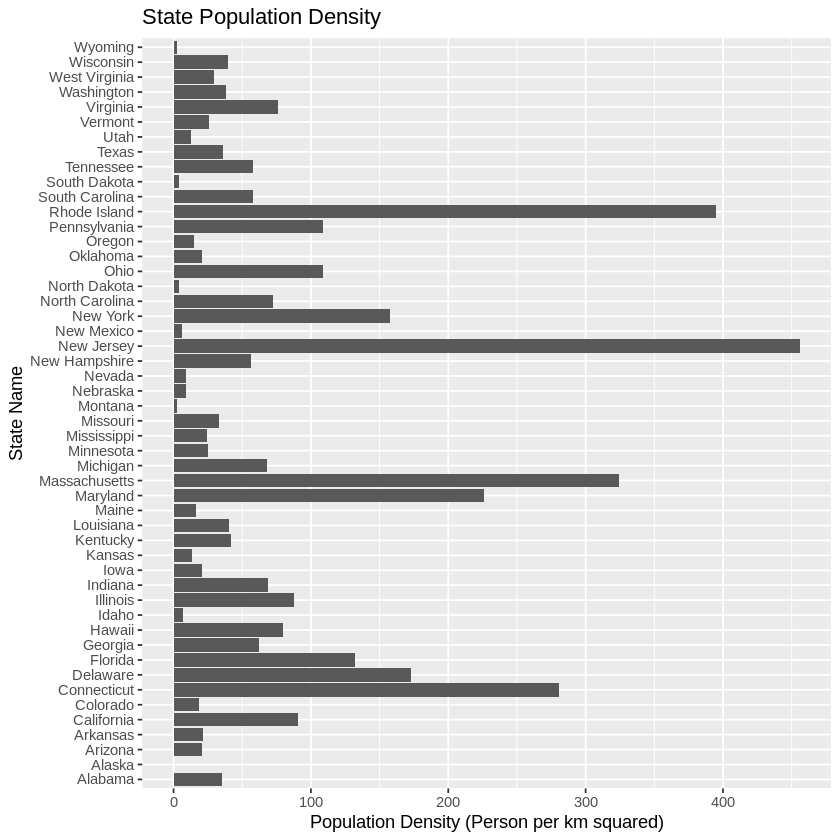

In [9]:
pop_density_plot = pop_density_summary %>%
    ggplot(aes(x = mean_density, y = state_name)) +
    geom_bar(stat="identity") +
    labs(y = "State Name", x = "Population Density (Person per km squared)", title =  "State Population Density") 

pop_density_plot